<a href="https://colab.research.google.com/github/Samarjeet-singh-chhabra/LR-Bike-Sharing-Demand-Prediction/blob/main/PERSONAL_NOTEBOOK_%7C_CP_2_%7C_BIKE_SHARING_DEMAND_PREDICTION_%7C_SAMARJEET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CAPSTONE - BIKE SHARING DEMAND PREDICTION**
*This project will be performed with the help of Supervised Linear Regression model. We will be performing basic check on the data for any errors followed by EDA and at last we will train our Machine Learning model on the data to predict outputs for new inputs provided.*


  


# **PROBLEM STATEMENT**


Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

# **UNDERSTANDING THE PROBLEM FROM A BUSINESS PRESPECTIVE.**

### *Why this business is progressing fast?*
1. Revenue in the Bike-sharing segment is projected to reach US$7.96bn in 2022.
2. In the Bike-sharing segment, the number of users is expected to amount to 930.3m users by 2026.
3. User penetration is 10.0% in 2022 and is expected to hit 11.8% by 2026.
4. Bike sharing business has a profit margin of almost 60%.
5. Bike sharing business is eco-friendly way of commute and so it attracts more customers.
6. Bike sharing businesses are also purpose-driven businesses in a way, as they help the environment to reduce its carbon footprint and air pollution.


### *Understanding the problem.*
1. As a business, our first priority is to benefit and serve our customers with the best service and no delay in service.
2. To avoid a bike shortage for our customers and to save their time, we need to be prepared beforehand. For that, we have to use our past data for predictions.
3. We can benefit our business by predicting how many bikes could be needed at a specified time, by just taking a look at the temperature, time, day, weather and many other things.
4. We can predict our revenue, profits and operation cost by predicting the total number of bikes that could be rented on a day.


# **INTRODUCTION**


*We have been provided with the bike rental demand data of 2017, in order to perform supervised liner regression and identify the relationships between different variables. The data includes information on the number of bike rentals, the weather conditions, and the day of the week. The goal is to use this data to predict the demand for bike rentals in the future.*

 

# **FEATURE'S DESCRIPTION**


**Date** - Date on which the bike was rented(year-month-day).

**Rented Bike count** - Number of bikes rented in that hour.

**Hour** - Hour of the day.

**Temperature** -Temperature at that time (Celsius).

**Humidity** - Percentage of humidity in air (%).

**Windspeed** - Speed of the wind (m/s).

**Visibility** - How far is the visibility (*10m).

**Dew point temperature** - The dew point is the temperature the air needs to be cooled at constant pressure to in order to achieve a relative humidityof 100% (°C).

**Solar radiation** - Solar radiation is the energy recieved on an area on earth from the Sun (MJ/m2).

**Rainfall** - Measure of Rainfall (mm).

**Snowfall** - Measure of Snowfall (cm).

**Seasons** - which season is bike rented (Winter, Spring, Summer, Autumn).

**Holiday** - Was it a holiday or not (Holiday/No holiday).

**Functional Day** - Was it a Functional day or not.(Yes/No).


# **INITIALIZING**

## Importing Libraries and Modules.

In [188]:
import pandas as pd

import numpy as np
from numpy import math

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from datetime import datetime
import datetime as dt

from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, MultiLabelBinarizer

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from sklearn.model_selection import cross_validate, train_test_split, GridSearchCV, cross_val_score, RepeatedStratifiedKFold, RandomizedSearchCV

from sklearn import metrics

from sklearn.metrics import r2_score, log_loss, mean_squared_error, accuracy_score, mean_absolute_error


# import warnings
# warnings.filterwarnings('ignore')

## Adding Dataset.

In [189]:
# Adding Data set throught link.
url = "https://drive.google.com/file/d/1dZ7p614gC_iwxHwcj-1N0Lc155AGMTJS/view?usp=sharing"
url='https://drive.google.com/uc?id=' + url.split('/')[-2]

# Naming our dataset
df =  pd.read_csv(url,  encoding= 'unicode_escape')


In [190]:
# Creating a copy, for working on it without harming the orignal dataset.
bike_df = df.copy()


## Data Overview

In [191]:
# checking top 5 Rows or instances.
bike_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [192]:
# checking last 5 Rows or instances.
bike_df.tail()      

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [193]:
# checking total rows and columns ( Rows, Columns).
bike_df.shape

(8760, 14)

Some insights:-
1.  We have 8760 instances and 14 features.

In [194]:
# checking basic information of all columns such as datatype, total number null values present, memory usage etc.
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

Some insights:-
1. We do not have any null values present in any column
2. We have 4 columns which have object data type. others are either float64 or int64.

In [195]:
# checking description of all data types columns.
bike_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Date,8760,365,01/12/2017,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rented Bike Count,8760.0,NaN,NaN,NaN,704.602055,644.997468,0.0,191.0,504.5,1065.25,3556.0
Hour,8760.0,NaN,NaN,NaN,11.5,6.922582,0.0,5.75,11.5,17.25,23.0
Temperature(°C),8760.0,NaN,NaN,NaN,12.882922,11.944825,-17.8,3.5,13.7,22.5,39.4
Humidity(%),8760.0,NaN,NaN,NaN,58.226256,20.362413,0.0,42.0,57.0,74.0,98.0
Wind speed (m/s),8760.0,NaN,NaN,NaN,1.724909,1.0363,0.0,0.9,1.5,2.3,7.4
Visibility (10m),8760.0,NaN,NaN,NaN,1436.825799,608.298712,27.0,940.0,1698.0,2000.0,2000.0
Dew point temperature(°C),8760.0,NaN,NaN,NaN,4.073813,13.060369,-30.6,-4.7,5.1,14.8,27.2
Solar Radiation (MJ/m2),8760.0,NaN,NaN,NaN,0.569111,0.868746,0.0,0.0,0.01,0.93,3.52
Rainfall(mm),8760.0,NaN,NaN,NaN,0.148687,1.128193,0.0,0.0,0.0,0.0,35.0


In [196]:
# Checking for unique values in each column
bike_df.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

# **CLEANING THE DATASET**


## Null values check




In [197]:
# Cheking for null values 
bike_df.isna().sum(axis = 0)

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

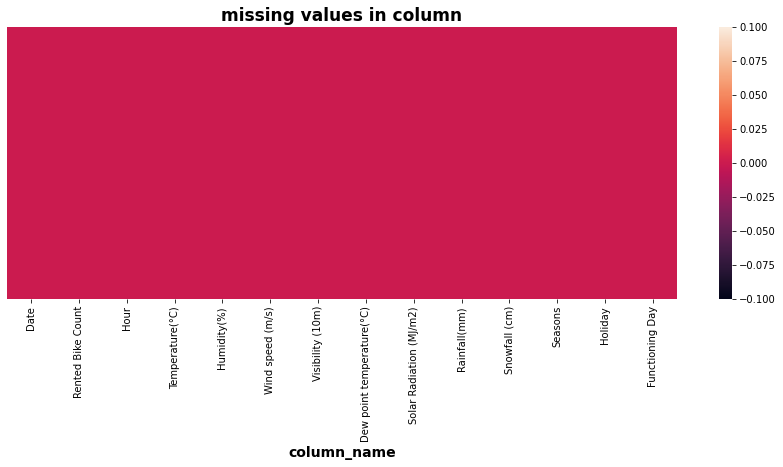

In [198]:
# Checking missing values
plt.figure(figsize=(15, 5))
sns.heatmap(bike_df.isnull(), cbar=True, yticklabels=False)
plt.xlabel("column_name", size=14, weight="bold")
plt.title("missing values in column",fontweight="bold",size=17)
plt.show()

Some insights:-
1. There exists no null values.

## Duplicate values check

In [199]:
# Checking for duplicate values
len(df[bike_df.duplicated()])

0

Some insights:-
1. There are no duplicate instances.

In [200]:
bike_df.shape[0]

8760

In [201]:
bike_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


# **ALTERING/CREATING FEATURES FOR EDA**

## Creating New columns for Day, Day of week, Month and Year.

In [202]:
# converting the date time column into DateTime format for further usage
bike_df['Date'] = pd.to_datetime(bike_df['Date'], format="%d/%m/%Y")

# Creating 4 new columns - Year, Month , Day , Day of week.
bike_df['year'] = bike_df['Date'].dt.year
bike_df['month'] = bike_df['Date'].dt.month_name()
bike_df['day'] = bike_df['Date'].dt.day
bike_df['day_of_week'] = bike_df['Date'].dt.day_name()

## Creating New columns for weekdays and weekend.

In [204]:
# We are creating a new column is_weekend which contains 1 if yes(saturday/sunday) else it contains 0 to represent weekdays
bike_df['is_weekend']=bike_df['day_of_week'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )


# **PERFORMING EDA**

In [206]:
bike_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,year,month,day,day_of_week,is_weekend
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,December,1,Friday,0
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,December,1,Friday,0
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,December,1,Friday,0
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,December,1,Friday,0
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,December,1,Friday,0


## Correlation between all features.

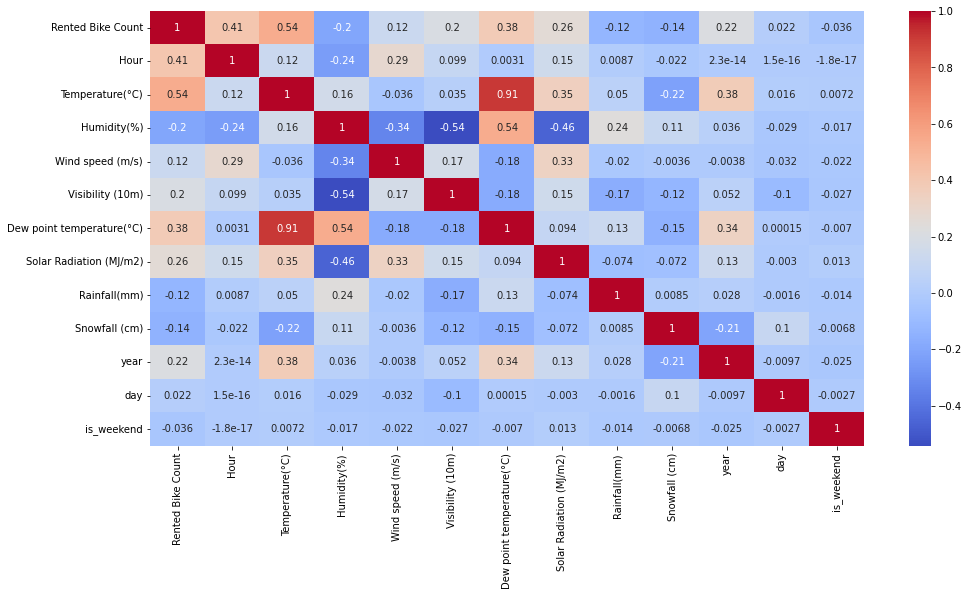

In [211]:
# Printing correlation heatmap

plt.figure(figsize=(16,8))
sns.heatmap(bike_df.corr(),annot=True,cmap="coolwarm")
plt.show()